In [ ]:
! pip install osmnx

In [2]:
import networkx as nx
import osmnx as ox

In [3]:
place_name = "Oricola, L'Aquila, Italia"

In [4]:
# Get the walk graph from place name
G = ox.graph_from_place(place_name, simplify=False, network_type="walk")

# Assuming an average walking speed of 5 km/h
avg_walking_speed = 5 # km/h

# Calculate edge travel times in seconds
for u, v, k, data in G.edges(data=True, keys=True):
    data['travel_time'] = (data['length']/1000)/(avg_walking_speed/3600)

In [5]:
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 3588
Number of edges: 7458


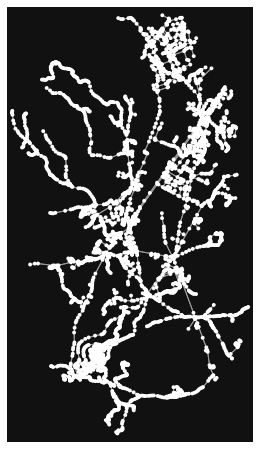

In [6]:
# Plot the graph
fig, ax = ox.plot_graph(G)

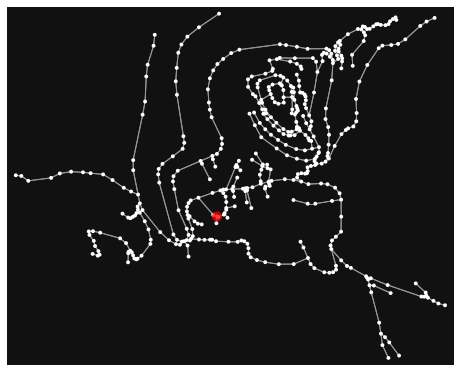

In [7]:
# nodes/edges we can reach by walking 10' from node 6135875028
G_600 = nx.ego_graph(G, 6135875028, 600, distance="travel_time")
ax, fig = ox.plot_graph_route(G_600, [6135875028])

In [20]:
# Node 6135875028 properties 
print(G.nodes[6135875028])
# Node 3076648512 properties 
print(G.nodes[3076648512])

{'y': 42.0473731, 'x': 13.0373966, 'street_count': 3}
{'y': 42.0510169, 'x': 13.0408072, 'street_count': 2}


In [16]:
# Shortest path from node 6135875028 to 3076648512
route = nx.shortest_path(G_600, 6135875028, 3076648512, "travel_time")

travel_time = sum([G_600.edges[o1, o2, 0]["travel_time"] for o1, o2 in zip(route, route[1:])])/60
route_m = sum([G_600.edges[o1, o2, 0]["length"] for o1, o2 in zip(route, route[1:])])

print(f"Avg walking speed: {avg_walking_speed} km/h")
print(f"Travel time: {round(travel_time)}'")
print(f"Length: {round(route_m,2)} m")

Avg walking speed: 5 km/h
Travel time: 8'
Length: 663.87 m


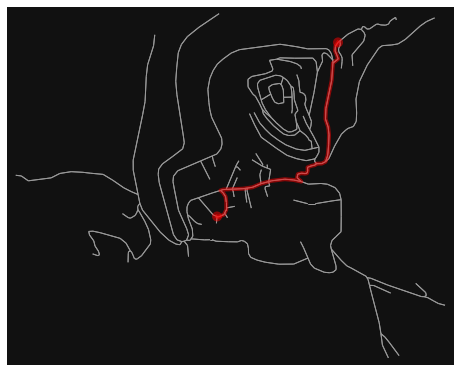

In [15]:
fig, ax = ox.plot_graph_route(G_600, route, node_size=0)